### Importing the Dependencies

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score


### Data Collection and Processing

In [3]:
# import the dataset to pd dataframe
loan_dataset = pd.read_csv('./train_u6lujuX_CVtuZ9i (1).csv')
type(loan_dataset)

loan_dataset.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
# number of rows and columns in the dataset
loan_dataset.shape

(614, 13)

In [5]:
# statistical measures 
loan_dataset.describe()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
# numeber of missings values in each column
loan_dataset.isnull().sum()


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
# dropping the missing values
loan_dataset = loan_dataset.dropna()

In [8]:
# numeber of missings values in each column
loan_dataset.isnull().sum()


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [9]:
# label encoding
loan_dataset.replace({"Loan_Status": {"Y": 1, "N": 0}}, inplace=True)

C:\Users\navee\AppData\Local\Temp\ipykernel_24312\3665440862.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_dataset.replace({"Loan_Status": {"Y": 1, "N": 0}}, inplace=True)


In [10]:
# Dependent column values 
loan_dataset['Dependents'].value_counts()


Dependents
0     274
2      85
1      80
3+     41
Name: count, dtype: int64

In [11]:
# Replacing '3+' with 4 in the 'Dependents' column
loan_dataset['Dependents'] = loan_dataset['Dependents'].replace('3+', 4)

# Converting the column to numeric type
loan_dataset['Dependents'] = pd.to_numeric(loan_dataset['Dependents'])

# Verifying the changes
print(loan_dataset['Dependents'].value_counts())

Dependents
0    274
2     85
1     80
4     41
Name: count, dtype: int64


### Data Visualization

<Axes: xlabel='Education', ylabel='count'>

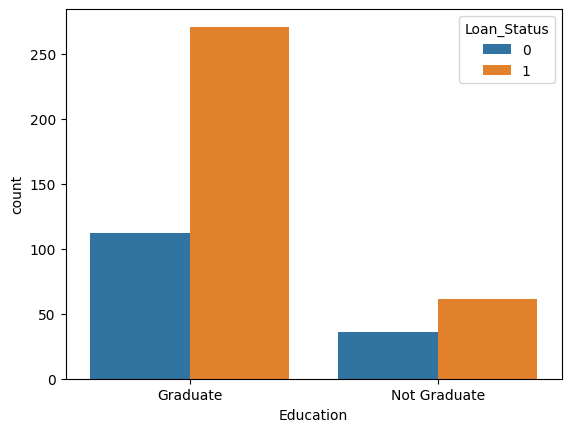

In [12]:
# education & Loan Status
sns.countplot(x="Education" , hue="Loan_Status", data=loan_dataset)

<Axes: xlabel='Married', ylabel='count'>

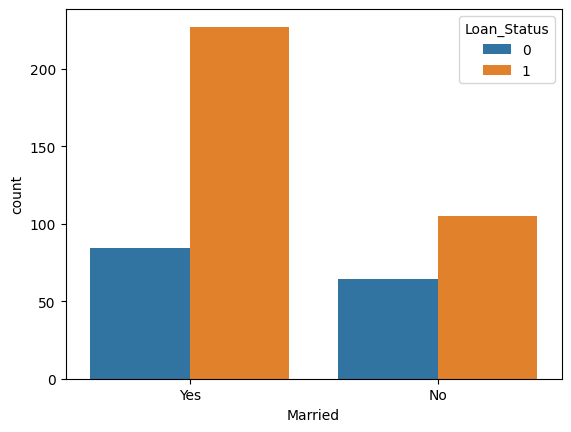

In [13]:
# martial status and loan status
sns.countplot(x="Married", hue="Loan_Status", data=loan_dataset)

In [14]:
# convert categorical columns to numerical values
loan_dataset.replace(
    {
        "Married": {"No": 0, "Yes": 1},
        "Gender": {"Male": 1, "Female": 0},
        "Self_Employed": {"No": 0, "Yes": 1},
        "Property_Area": {"Rural": 0, "Semiurban": 1, "Urban": 2},
        "Education": {"Not Graduate": 0, "Graduate": 1},
    },
    inplace=True,
)

C:\Users\navee\AppData\Local\Temp\ipykernel_24312\1513000428.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_dataset.replace(


In [15]:
# separting the data and label
X = loan_dataset.drop(columns=["Loan_ID", "Loan_Status"], axis=1)
Y = loan_dataset["Loan_Status"]

print(X)
print(Y)


     Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1           1          1              0             4583   
2         1        1           0          1              1             3000   
3         1        1           0          0              0             2583   
4         1        0           0          1              0             6000   
5         1        1           2          1              1             5417   
..      ...      ...         ...        ...            ...              ...   
609       0        0           0          1              0             2900   
610       1        1           4          1              0             4106   
611       1        1           1          1              0             8072   
612       1        1           2          1              0             7583   
613       0        0           0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Ter

### Train Test Split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, stratify=Y, random_state=2
)

print(X.shape, X_train.shape, X_test.shape)

# print(Y.shape, y_train.shape, y_test.shape)


(480, 11) (384, 11) (96, 11)


### Training the model: 

#### Support Vector Machine Model

In [17]:
classifier = svm.SVC(kernel='linear')

# training the support vector machine
classifier.fit(X_train, y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


### Model evaluation

In [18]:
# accuracy score on training data
X_train_prediction = classifier.predict(X_train)
train_accuracy = accuracy_score(X_train_prediction, y_train)
print("Accuracy on training data:", train_accuracy)


Accuracy on training data: 0.7786458333333334


In [19]:
 # accuracy score on test data
X_test_prediction = classifier.predict(X_test)
test_accuracy = accuracy_score(X_test_prediction, y_test)
print("Accuracy on test data:", test_accuracy)


Accuracy on test data: 0.8125


### Making a Predictive System

In [20]:
# Making a Predictive System

# Example input data (replace with real values)
input_data = X.iloc[2].values


# Convert to NumPy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the array (since we are predicting for one instance)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Make prediction
prediction = classifier.predict(input_data_reshaped)

if prediction[0] == 1:
    print("✅   loan is approved .")
else:
    print("❌ hey no loan for you .")


✅ The loan is approved.


c:\Users\navee\project5_ml\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
